<a href="https://colab.research.google.com/github/IK2023-info/ik2023-lab09-10-napsugarinf/blob/main/Copy_of_linreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lineáris regresszió Python-ban



----


Regressziószámítással során véletlen változók között fennálló kapcsolatot modellezzük. A [lineáris regresszió](https://hu.wikipedia.org/wiki/Line%C3%A1ris_regresszi%C3%B) esetében feltételezzük, hogy a magyarázó- ($X$) és a magyarázott ($Y$) változók közti összefüggés lineáris:
$$y_i = c_0 + c_1x_{i1} + c_2x_{i2} + \dots + c_kx_{ik} + \epsilon_i$$

ahol $\epsilon_i$ egy meg nem figyelt véletlen változó, amely "zajjal" perturbálja a magyarázó és a magyarázott változók közötti lineáris kapcsolatot.


A lineáris regresszió becslése során, valamilyen optimumkeresési eljárás segítségével (pl. a [legkisebb négyzetek módszere](https://hu.wikipedia.org/wiki/Legkisebb_n%C3%A9gyzetek_m%C3%B3dszere)), megkeressük a $c_i$ paramétervektorokat, melyekkel minimalizálják a hibát a rendelkezésre álló mintákhoz képest.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/Linear_least_squares_example2.png/952px-Linear_least_squares_example2.png)

Ábra 1. A lineáris regresszió alkalmazásánál, feltételezzük, hogy a rendelkezésre álló minták, megfigyelések (piros pontok), egy függő ($y$) és egy független változó ($x$) közötti lineáris viszonytól (kék vonal) való véletlenszerű kisebb eltérésekből (zöld vonalak) származnak. [Kép forrása](https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/Linear_least_squares_example2.png/952px-Linear_least_squares_example2.png)

Python-ban, a lineáris regresszió számítására a `scikit-learn` csomag [`sklearn.linear_model.LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) modelljét [alkalmazhatjuk](https://realpython.com/linear-regression-in-python/).

## Példa

 

Automatically created module for IPython interactive environment
Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


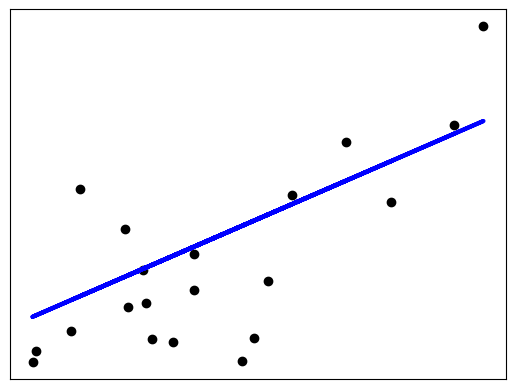

In [54]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

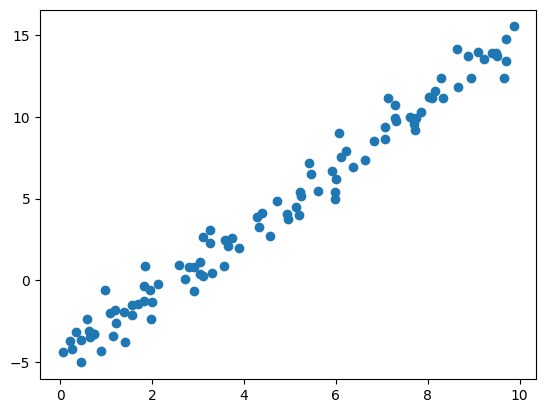

In [55]:
#1.feladat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

rng = np.random.RandomState(42) 
x = 10 * rng.rand(100) 
y = 2 * x - 5 + rng.randn(100) 
plt.scatter(x, y);

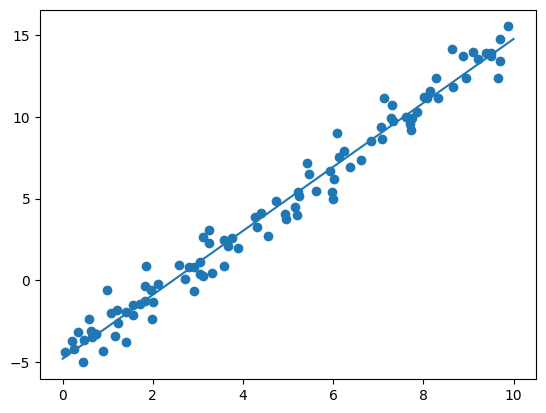

In [56]:
model = LinearRegression()

# fit the model using the x and y data
model.fit(x[:, np.newaxis], y)

# generate predictions using the x data
xfit = np.linspace(0, 10, 100)
yfit = model.predict(xfit[:, np.newaxis])

# plot the data and the linear regression line
plt.scatter(x, y)
plt.plot(xfit, yfit);

In [57]:
#2.feladat
#R squared
r_squared = model.score(x[:, np.newaxis], y)

# Intercept 
intercept = model.intercept_

#slope
slope = model.coef_[0]

print("R^2 érték:", r_squared)
print("Intercept:", intercept)
print("Slope:", slope)

R^2 érték: 0.9764567983510799
Intercept: -4.78490384245325
Slope: 1.9540226772876963


In [58]:
#3.feladat

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
#3.feladat
#load dataset
path='/content/drive/My Drive/house_sales.csv'

data=pd.read_csv(path)
print(data.shape)
data.head(5)

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


<Axes: xlabel='price', ylabel='Count'>

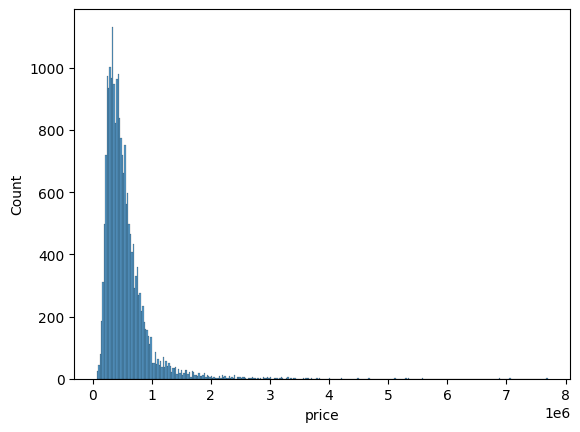

In [60]:
import seaborn as sns

sns.histplot(data=data, x='price')

<Axes: >

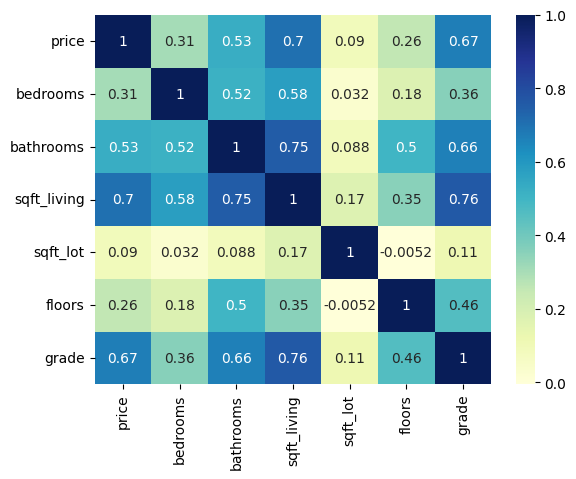

In [61]:
corr = data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade']].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = data[['sqft_living', 'grade']]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(y_pred)
print('RMSE: ', rmse)
print('R-squared: ', r2)

[ 570225.72332636  724145.96940919 1173155.41042044 ...  303724.87949668
  679097.39948084  651821.99835822]
RMSE:  261161.57654392568
R-squared:  0.5275541477040839


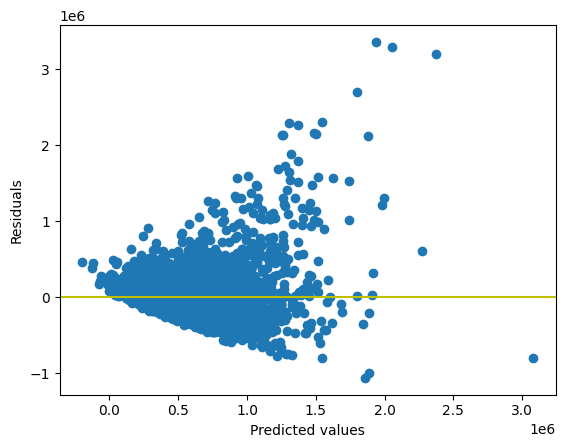

In [63]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='y', linestyle='-')
plt.show()

# Feladatok

1.	Illesszünk lineáris regresszió függvényt `sklearn.linear_model.LinearRegression` segítségével, a következő adatokra: 
```python
rng = np.random.RandomState(42) 
x = 10 * rng.rand(100) 
y = 2 * x - 5 + rng.randn(100) 
plt.scatter(x, y);
```

2.	Írassuk ki a regressziós egyenes hibáját (R négyzet érték) és a regressziós vonal lejtő-elfogását (*intercept*) és meredekségét (*slope*). 

3.	A `house_sales.csv` állomány házeladási tranzakciókat tartalmaz, feltüntetve a ház paramétereit (szobák, emeletek száma, terület, állapot, kilátás stb.) és az eladási árat. Vizualizáljuk a paraméterek eloszlását majd építsünk egy lineáris regresszió modellt, mely különböző paraméterekre, megbecsüli egy háznak az árát. Vizsgáljuk meg a modell pontosságát. 

4.	Teszteljük vizuálisan (ha valamilyen mintázat látszik a ploton, akkor valamilyen nemlineáris hatás is jelen van) a linearitást  a reziduálisok és regressziós paraméterek pontdiagramon való ábrázolásával. (A reziduális annak mértéke, hogy egy pont milyen távolságra van függőlegesen a regressziós egyenestől. Egyszerűen az előre jelzett érték és a megfigyelt tényleges érték közötti eltérést/hibát jelenti.)

5.	Ábrázoljuk a reziduálisok eloszlását hisztogram és [Q–Q plot](https://towardsdatascience.com/q-q-plots-explained-5aa8495426c0) segítségével.